<a href="https://colab.research.google.com/github/Akash276/AI-Solutions/blob/master/Comcast_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import re
import pickle
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, save
from bokeh.models import ColumnDataSource
from bokeh.transform import cumsum
from bokeh.io import curdoc
curdoc().theme = 'dark_minimal'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
#importing the dataset
ca_df = pd.read_csv('/content/gdrive/My Drive/Intern_ML/Data_Sets/Q_1/comcast_consumeraffairs_complaints.csv')
fcc_df = pd.read_csv('/content/gdrive/My Drive/Intern_ML/Data_Sets/Q_1/comcast_fcc_complaints_2015.csv')
peacock_theme = ['#cc004c','#f37021','#fcb711','#6460aa','#0089d0','#0db14b','#ffc0cb','#00ffff']

In [7]:
ca_df.head()

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [8]:
fcc_df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...


In [9]:
#customer satisfaction
csat = len(ca_df.loc[ca_df['rating']>=4])/len(ca_df)
print("Comcast's Customer Satisfaction Score calculated from ConsumerAffairs is {:.2f}%".format(csat*100))

Comcast's Customer Satisfaction Score calculated from ConsumerAffairs is 0.90%


In [10]:
rating_df = pd.DataFrame({'class': ['0', '1', '2', '3', '4', '5'],
                          'percent' : ca_df['rating'].value_counts(normalize=True).sort_index()*100,
                          'angle': ca_df['rating'].value_counts(normalize=True).sort_index() * 2 * np.pi,
                          'color': peacock_theme[0:6]})

rating_src = ColumnDataSource(rating_df)
# Date range of ratings
sorted_dates = ca_df['posted_on'].sort_values().reset_index(drop=True).tolist()
rating_plt_title = 'Comcast ConsumerAffairs Ratings {} - {}'.format(sorted_dates[0], sorted_dates[-1])

# Create the Figure object "rating_plt"
rating_plt = figure(title=rating_plt_title, tools=['save', 'hover'], tooltips='@percent{0.00}%')

# Add circular sectors to "rating_plt"
rating_plt.wedge(x=0, y=0, radius=0.8, source=rating_src, start_angle=cumsum('angle', include_zero=True),
                 end_angle=cumsum('angle'), fill_color='color', line_color=None, legend_field='class')

# Change parameters of "rating_plt"
rating_plt.axis.visible = False
rating_plt.grid.grid_line_color = None
rating_plt.legend.orientation = 'horizontal'
rating_plt.legend.location = 'top_center'
output_notebook()
show(rating_plt)

In [11]:
#Time series analysis
ca_df['posted_on'] = pd.to_datetime(ca_df['posted_on'])

groupby_posted_on = ca_df.groupby('posted_on').count()

ts_src = ColumnDataSource(groupby_posted_on)

ts_plt_title = 'Number of reviews per day {} - {}'.format(sorted_dates[0], sorted_dates[-1])
ts_plt = figure(title=ts_plt_title, x_axis_type='datetime', tools=['save', 'hover'], tooltips=[('Count', '@rating')])

ts_plt.line(x='posted_on', y='rating', line_width=2, source=ts_src, color=peacock_theme[0])

ts_plt.yaxis.axis_label = 'Number of Reviews'

show(ts_plt)

In [12]:
groupby_posted_on.loc[groupby_posted_on['rating'] > 50]

,author,rating,text
posted_on,,,
2016-02-24,64,64,64


In [13]:
ca_df.loc[ca_df['posted_on'] == '2016-02-24']

,author,posted_on,rating,text
179,"Joshua of Philadelphia, PA",2016-02-24,1,My modem is directly connected to my computer....
1817,"Pene of Las Vegas, NV",2016-02-24,3,The field technician was great. However it too...
1818,"Beverly of Chesterfield, VA",2016-02-24,3,Had issue getting voice mail but customer serv...
1819,"John of Berkeley, CA",2016-02-24,3,"They're generally curious, knowledgeable, and ..."
1820,"Yvonne of Mt. Juliet, TN",2016-02-24,2,It's so difficult to reach them. I usually had...
...,...,...,...,...
1875,"Cynthia of Canton, GA",2016-02-24,1,"Minimally, it takes five minutes before you re..."
1876,"peggy of Boulder, CO",2016-02-24,1,If one wants it... one has to actually head do...
1877,"V of Gibbstown, NJ",2016-02-24,2,I had extremely slow internet for YEARS and th...
1878,"Monica of Vallejo, CA",2016-02-24,2,It takes over 5 minutes of listening to a phon...


In [14]:
fcc_df['Date'] = pd.to_datetime(fcc_df['Date'])

ca_df['Count'] = 0
ca_df2 = ca_df.loc[ca_df['posted_on'] >= '2015-01-01']
groupby_posted_on = ca_df2.groupby('posted_on').count()

ts_ca_src = ColumnDataSource(groupby_posted_on)

fcc_df['Count'] = 0
groupby_date = fcc_df.groupby('Date').count()

ts_fcc_src = ColumnDataSource(groupby_date)

ts_fcc_plt = figure(title="Number of Customer FCC Complaints and ConsumerAffairs Reviews Per Day",
                    x_axis_type='datetime', tools=['save', 'hover'], tooltips=[('Count', '@Count')])

ts_fcc_plt.line(x='Date', y='Customer Complaint', line_width=2, source=ts_fcc_src, color=peacock_theme[1],
                legend_label=' # of FCC Customer Complaints')

ts_fcc_plt.line(x='posted_on', y='rating', line_width=2, source=ts_ca_src, color=peacock_theme[0],
                legend_label='# of ConsumerAffairs Reviews')

show(ts_fcc_plt)
fcc_df = fcc_df.drop(columns="Count")

In [15]:
#complaint categories
fcc_df['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Data Caps                                        11
                                                 ..
Fradulent Services                                1
Comcast Home Security System                      1
internet/cable service                            1
Business practices and customer treatment         1
unauthorized charges to my account by comcast     1
Name: Customer Complaint, Length: 1842, dtype: int64

In [16]:
def get_simple_topic_percentage(topic):
    """
    Returns a percentage of rows that this particular topic is found
    in using simple string manipulation. Note: this can have overlaps,
    for example if you have two topics, one 'Internet' and one 'Speed',
    you will get duplicate findings if the customer has 'Internet Speed'
    as their topic.
    
    topic: the customer complaint category entered by the customer.
    """
    return fcc_df[fcc_df['Customer Complaint'].str.contains(topic, case=False)].shape[0] / len(fcc_df['Customer Complaint']) * 100
    

print('Comcast:', get_simple_topic_percentage('comcast'))
print('Data cap:', get_simple_topic_percentage('data'))
print('Speed:', get_simple_topic_percentage('speed'))
print('Internet:', get_simple_topic_percentage('internet'))
print('Price:', get_simple_topic_percentage('price'))
print('Bill:', get_simple_topic_percentage('bill'))
print('Customer Service:', get_simple_topic_percentage('customer service'))

Comcast: 56.044943820224724
Data cap: 9.887640449438202
Speed: 8.629213483146067
Internet: 23.91011235955056
Price: 2.6516853932584272
Bill: 17.078651685393258
Customer Service: 3.50561797752809


In [17]:
#Data preprocessing
from spacy.lang.en import English
nlp = English()

customize_stop_words = ['comcast', 'i', 'fcc', 'hello', 'service', 'services', 'issue', 'issues', 'problem', 'problems', 'xfinity', 'customer', 'complaint', '$']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

def preprocess(verbatim):
    """
    Tokenizes, removes stopwords, and lemmatizes a verbatim text
    
    verbatim: a free-form text complaint
    """
    # Every verbatim ends with the FCC follow up, let's remove this.
    verbatim = verbatim.split('\n')[0].lower()
    doc = nlp(verbatim)
    sent = []
    for word in doc:
        # If it's not a stop word or punctuation mark, add it to our article!
        if word.text != 'n' and not word.is_stop and not word.is_punct and not word.like_num:
            # We add the lematized version of the word
            sent.append(word.lemma_.lower())
    return sent

# Tokenize each complaint
docs = fcc_df['Description'].apply(lambda verbatim: preprocess(verbatim))

In [18]:
docs[0]

['contacting',
 'internet',
 'technical',
 'support',
 'months',
 'resolve',
 'slow',
 'internet',
 'speed',
 'permanent',
 'resolution',
 'sent',
 'techs',
 'residence',
 'replaced',
 'hardware']

[('internet', 533), ('billing', 294), ('data', 220), ('speed', 121), ('cap', 106), ('caps', 79), ('practices', 73), ('speeds', 72), ('charges', 71), ('bill', 64), ('unfair', 59), ('cable', 56), ('throttling', 54), ('slow', 49), ('usage', 47), ('poor', 45), ('pricing', 42), ('price', 40), ('connection', 37), ('business', 33), ('contract', 30), ('phone', 30), ('false', 27), ('charged', 27), ('account', 26), ('charging', 25), ('high', 25), ('fees', 24), ('deceptive', 23), ('charge', 23)]


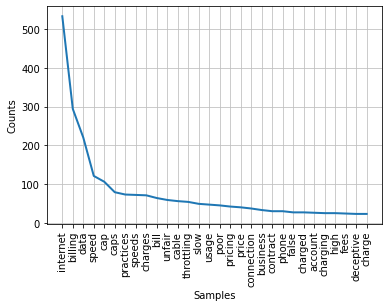

In [19]:
import nltk
from nltk import FreqDist
cats = fcc_df['Customer Complaint'].apply(lambda verbatim: preprocess(verbatim))
filtered_complaints = [c for cl in cats for c in cl]
fdist = FreqDist(filtered_complaints)
print(fdist.most_common(30))
fdist.plot(30)

In [20]:
import gensim
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)

print('Distinct words in initial documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 30% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.3)

print('Distinct words after removing rare and common words:', len(dictionary))

Distinct words in initial documents: 7249
Distinct words after removing rare and common words: 1149


In [21]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 3.2MB/s 
     |████████████████████████████████| 552kB 18.9MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=bf300a917b2a2dc8425250a7741d8e06a0c64761b68fc93cf35b7018a48e5a8d
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=20dc7ca4e42ab7f8df0a5cc93ce4b2552790413d1a3eacb7b52e13356de524df
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyldavis funcy


In [22]:
from gensim.models import CoherenceModel, LdaModel
import pyLDAvis.gensim

corpus = [dictionary.doc2bow(doc) for doc in docs]
num_topics = 8

filename = 'lda_model.pickle'
model = []
found = False
try: 
    infile = open(filename,'rb')
    model = pickle.load(infile)
    infile.close()
    found = True
    print('Model found..loaded.')
except:
    print('Model not found!')

if not found:
    %time model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, workers=2)
    outfile = open(filename,'wb')
    pickle.dump(model, outfile)
    outfile.close()

Model not found!


Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

CPU times: user 35.1 s, sys: 3.14 s, total: 38.2 s
Wall time: 39 s


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [23]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.153529  0.009593       1        1  31.586739
7      0.119283  0.098562       2        1  14.349447
3     -0.048145 -0.021057       3        1  13.058886
6      0.101526  0.089942       4        1  10.744603
0      0.074204 -0.063530       5        1   9.080047
1      0.006814 -0.044556       6        1   8.691725
2     -0.126436 -0.244380       7        1   7.145455
5     -0.280775  0.175427       8        1   5.343098, topic_info=          Term        Freq       Total Category  logprob  loglift
368       data  466.000000  466.000000  Default  30.0000  30.0000
84       cable  638.000000  638.000000  Default  29.0000  29.0000
194      modem  477.000000  477.000000  Default  28.0000  28.0000
9        speed  537.000000  537.000000  Default  27.0000  27.0000
60         cap  244.000000  244.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
303      order   32.541771  164.464661   Topic8  -4.6002   1.3092
258        use   29.327421  249.190384   Topic8  -4.7042   0.7897
470  available   27.411915  137.241684   Topic8  -4.7717   1.3186
55      signed   27.058628  189.637390   Topic8  -4.7847   0.9823
603       cost   26.054516  129.700394   Topic8  -4.8225   1.3243

[520 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
262       3  0.621695  105mbps
262       5  0.310848  105mbps
617       3  0.659651   25mbps
617       5  0.314119   25mbps
144       1  0.026550   50mbps
...     ...       ...      ...
65        8  0.093842    years
366       3  0.146349  youtube
366       5  0.048783  youtube
366       6  0.536612  youtube
366       8  0.195132  youtube

[1587 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 4, 7, 1, 2, 3, 6])

In [24]:
#Splitting the dataset
from sklearn.metrics.pairwise import cosine_similarity

fcc_df_super = fcc_df.copy()

fcc_df_super['Tokens'] = docs

docs_upper = fcc_df_super['Tokens'].apply(lambda l: l[:int(len(l)/2)])
docs_lower = fcc_df_super['Tokens'].apply(lambda l: l[int(len(l)/2):])

In [25]:
#Transform the data
corpus_upper = [dictionary.doc2bow(doc) for doc in docs_upper]
corpus_lower = [dictionary.doc2bow(doc) for doc in docs_lower]

# Using the corpus LDA model tranformation
lda_corpus_upper = model[corpus_upper]
lda_corpus_lower = model[corpus_lower]

In [26]:
from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False): 
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    
    model: the LDA model
    corpus: the documents
    kwords: if True adds and returns the keys
    '''
    top_dist =[]
    keys = []
    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [np.asarray(vals)]
        if kwords:
            keys += [np.asarray(vals).argmax()]

    return np.asarray(top_dist), keys

In [27]:
top_dist_upper, _ = get_doc_topic_dist(model, lda_corpus_upper)
top_dist_lower, _ = get_doc_topic_dist(model, lda_corpus_lower)

print("Intra-similarity:", np.mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1, c2 in zip(top_dist_upper, top_dist_lower)]))

random_pairs = np.random.randint(0, len(fcc_df_super['Description']), size=(400, 2))

print("Inter-similarity:", np.mean([cosine_similarity(top_dist_upper[0].reshape(1, -1), top_dist_lower[1].reshape(1, -1))]))

Intra-similarity: 0.7884895
Inter-similarity: 0.32924628


In [28]:
#Topic labeling
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('\nTopic {}\n'.format(str(i)))
    for term, frequency in model.show_topic(i, topn=10):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

term                 frequency


Topic 0

speed                0.054
speeds               0.042
mbps                 0.023
paying               0.019
slow                 0.017
download             0.017
pay                  0.013
times                0.013
getting              0.013
time                 0.013

Topic 1

time                 0.017
month                0.015
company              0.013
customers            0.013
bill                 0.012
use                  0.012
pay                  0.010
years                0.009
netflix              0.008
work                 0.008

Topic 2

data                 0.088
cap                  0.051
gb                   0.034
usage                0.023
caps                 0.021
area                 0.020
use                  0.018
limit                0.017
netflix              0.010
broadband            0.009

Topic 3

month                0.040
speed                0.023
bill                 0.020
price                0.020
paying    

In [29]:
top_labels = {0: 'Internet Speed', 1:'Moving Services', 2:'Customer Service', 3:'Billing', 4:'Data Caps', 5: 'Business Contracts', 6:'Missed Appointments', 7: 'Pricing'}

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvectorizer = TfidfVectorizer(input='content', analyzer = 'word', lowercase=True, stop_words='english',
                                  tokenizer=preprocess, ngram_range=(1,3), min_df=40, max_df=0.20,
                                  norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)

dtm = tvectorizer.fit_transform(fcc_df_super['Description']).toarray()

In [31]:
top_dist, lda_keys= get_doc_topic_dist(model, corpus, True)
features = tvectorizer.get_feature_names()

In [32]:
top_words = []
for n in range(len(dtm)):
    inds = np.int0(np.argsort(dtm[n])[::-1][:4])
    top_words += [', '.join([features[i] for i in inds])]
    
fcc_df_super['Description Top Words'] = pd.DataFrame(top_words)
fcc_df_super['Topic'] = pd.DataFrame(lda_keys)
# Fill missing values with dummy
fcc_df_super['Topic'].fillna(-1, inplace=True)

In [33]:
fcc_df_super.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description,Tokens,Description Top Words,Topic
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...,"[contacting, internet, technical, support, mon...","resolution, support, resolve, internet speed",0
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...,"[january, payments, january, february, advance...","payment, care, number, account",7
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...,"[home, located, acworth, georgia, signed, year...","high speed internet, billed, high speed, speed...",7
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...,"[atlanta, area, effect, unprecendented, usage,...","gb, usage, cap, area",2
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...,"[sort, years, like]","years, like, gone, forced",2


In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(top_dist)

fcc_df_super['Description Truncated'] = fcc_df_super['Description'].apply(lambda x: x[0:140])
fcc_df_super['X_tsne'] = X_tsne[:,0]
fcc_df_super['Y_tsne'] = X_tsne[:,1]

fcc_df_super['Colors'] = fcc_df_super['Topic'].apply(lambda topic_num: peacock_theme[topic_num])

source = ColumnDataSource(dict(
    x=fcc_df_super['X_tsne'],
    y=fcc_df_super['Y_tsne'],
    color=fcc_df_super['Colors'],
    label=fcc_df_super['Topic'].apply(lambda t: top_labels[t]),
    old_topic=fcc_df_super['Customer Complaint'],
    top_words=fcc_df_super['Description Top Words'],
    description=fcc_df_super['Description Truncated']))

In [35]:
title = 'T-SNE Visualization of Topics'
plot_tsne = figure(plot_width=1000, plot_height=600, title=title,
                   tools=['pan', 'wheel_zoom', 'save', 'hover'],
                   tooltips=[("Old Topic","@old_topic"),
                   ("Description","@description"),
                   ("Top Words","@top_words")])

plot_tsne.scatter(x='x', y='y', legend_field='label', source=source, color='color', alpha=0.6, size=5.0)
plot_tsne.legend.location = "top_right"

show(plot_tsne)